In [6]:
!source ~/.bashrc && \
    unset PYSPARK_PYTHON && \
    unset PYSPARK_DRIVER_PYTHON && \
    unset PYSPARK_DRIVER_PYTHON_OPTS && \
    cd /Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/ && \
    src/model_pipeline.sh 0112_test

## Boilerplate

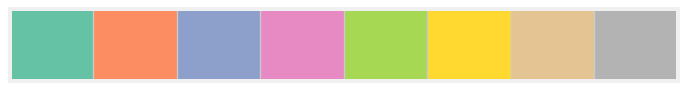

In [1]:
%run initialize.ipynb

import cPickle as pickle
import json

from pyspark.sql import Window

In [2]:
rcParams['figure.figsize'] = (12,8)
rcParams['figure.dpi'] = 96

## Global Functions

## Manual initialize
* make a directory
* put model.json and plots.json in their
* TODO: gen model config

In [9]:
!mkdir ../modeling-football-outcomes/models/0114_test_ou/

In [17]:
model_dict = {
    'model_id': '0111_ou_initial',
    'features_tbl': 'features.0111_ou_test',
    'labels_tbl': 'labels.0111_ou_test',
    'features_list': ['season','week_id', 'sbr_ou'],
    'label_col': 'is_sbr_ou_over',
    'pos_labels': [1],
    'neg_labels': [-1],
    'index': ['game_id'],
    'kfolds': 5,
    'kfold_seed': 99,
    'dataset_seed': 9,
    'strata_cols': [],
    'global_dataset_proportions': {
        'holdout': 0.5,
        'throw_away': 0,
        'in_training': 0.5,
        'scoring_only': 0
    },
    'dimensional_dataset_proportions': {},
    'model': 'xgboost.XGBClassifier',
    'model_params': {
        'booster':'gbtree',
        'gamma': 0,
        'learning_rate': 0.1,
        'max_depth': 3,
        'max_features': 'auto',
        'n_estimators': 200,
        'n_jobs': 1,
        'nthread': None,
        'objective': 'binary:logistic',
        'random_state': 9,
        'silent': True,
        'subsample': 0.9
    }    
}

In [18]:
with open('../modeling-football-outcomes/models/0114_test_ou/model.json','w') as w:
    json.dump(model_dict, w, indent=4)

In [24]:
with open('../modeling-football-outcomes/models/0112_test/plots.json','w') as w:
    json.dump(plots_dict, w, indent=4)

### Start execution